In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

%matplotlib inline

In [234]:
def MCMC_simple_int(func, rng, num_samples, proposal_sigma=1.0):
    xi = np.random.uniform(*rng)
    n = 0
    x = np.array([], dtype=np.float)
    for i in range(num_samples):
        x = np.append(x, xi)
        xg = np.random.normal(xi, proposal_sigma)
        if xi>=rng[0] and xi<=rng[1]:
            n += 1
        if np.random.uniform(0,1) < func(xg)/func(xi):
            xi = xg
    return (rng[1]-rng[0])*float(n)/float(num_samples), x

In [235]:
def MCMC_int(func, pars, pi, rng, num_samples, proposal_sigma=1.0):
    xi = np.random.uniform(*rng)
    s  = 0.0
    n = 0
    x = np.array([], dtype=np.float)
    for i in range(num_samples):
        s += func(xi, pars)
        x = np.append(x, xi)
        xg = np.random.uniform(*rng)
        if np.random.uniform(0,1) < pi(xg)/pi(xi):
            xi = xg
    return s/float(num_samples),x

In [236]:
def func(x,n):
    return g(x)*f(x,n)

def g(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)
    #return x*np.exp(-x**2/2)

def f(x,n):
    return x**n

In [247]:
val, err = integrate.quad(g,3, 4)

In [248]:
val

0.0013182267897969748

In [249]:
val, samples = MCMC_simple_int(g,rng= [3,4],num_samples= 50000)

In [250]:
val

0.00122

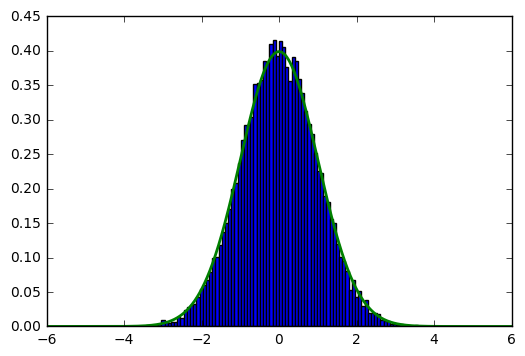

In [252]:
plt.hist(samples, bins=100, normed=True);
x=np.linspace(-6,6,10000)
plt.plot(x, g(x)/integrate.quad(g,-np.inf, np.inf)[0], lw=2)

In [269]:
xlo = -4
xhi = 4
val, err = integrate.quad(func,xlo, xhi, args=(4))
nsamples = [i*10 for i in range(1,150)]
ivals    = [MCMC_int(f, 4, g, [xlo, xhi], i)[0] for i in nsamples]

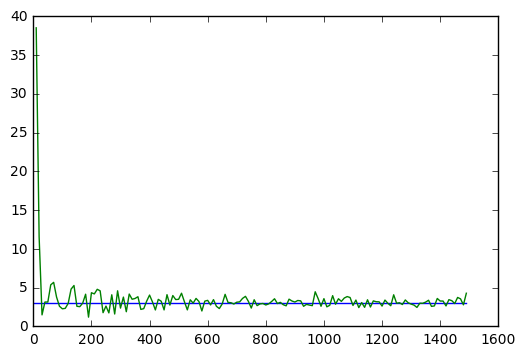

In [270]:
plt.plot([1, nsamples[-1]], [val, val])
plt.plot(nsamples, np.array(ivals))

In [271]:
xlo = -2
xhi = 4
val, err = integrate.quad(func,xlo, xhi, args=(4))
nsamples = [i*10 for i in range(1,150)]
ivals    = [MCMC_int(f, 4, g, [xlo, xhi], i)[0] for i in nsamples]

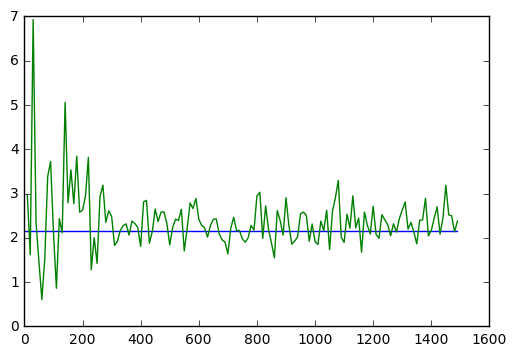

In [272]:
plt.plot([1, nsamples[-1]], [val, val])
plt.plot(nsamples, np.array(ivals))

In [273]:
xlo = 0
xhi = 4
val, err = integrate.quad(func,xlo, xhi, args=(4))
nsamples = [i*10 for i in range(1,150)]
ivals    = [MCMC_int(f, 4, g, [xlo, xhi], i)[0] for i in nsamples]

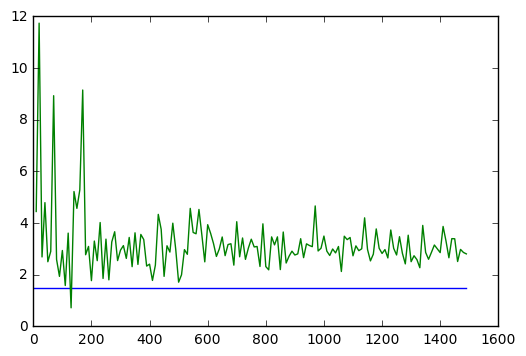

In [274]:
plt.plot([1, nsamples[-1]], [val, val])
plt.plot(nsamples, np.array(ivals))

In [275]:
xlo = 0
xhi = 1
val, err = integrate.quad(func,xlo, xhi, args=(2))
nsamples = [i*10 for i in range(1,150)]
ivals    = [MCMC_int(f, 2, g, [xlo, xhi], i)[0] for i in nsamples]

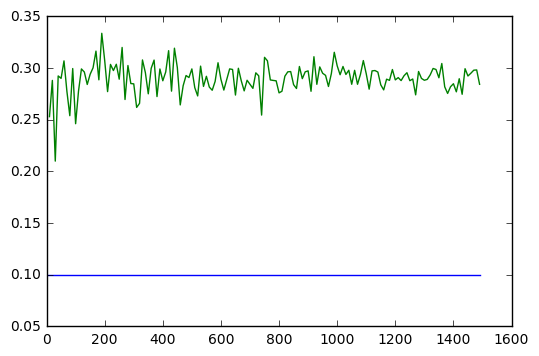

In [276]:
plt.plot([1, nsamples[-1]], [val, val])
plt.plot(nsamples, np.array(ivals))